In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
colors_list = ['r','b','g','c','m','y','k']

In [2]:
def projectile(v=10,ang=45,x0=0,y0=0,g=9.8,pts=10):
    '''
    This will output totaltime,Range,hmax, y and x values for different times
    Usage: default values are 
        v=10,ang=45,x0=0,y0=0,g=9.8,pts=10
    You can change these values to update the parameters of your choice
    v = initial velocity
    ang = launch angle in degrees 
    x0 = initial horizontal distance if any
    y0 = launch height if any
    g = 9.8 m/s^2 acceleration due to gravity
    pts = total number of points in the trajectory to plot
    '''
    ang = np.radians(ang)
    vx = v * np.cos(ang)
    vy = v * np.sin(ang) 
    # y = y0 + vy * t - 1/2 g * t^2; 
    # y = 0 for whole trajectory
    # vy * t = (1/2) g * t^2
    # t = 2vy/g = 2 * v * np.sin(ang)
    # horizontal range(R) = vx * total time (t)
    # R = vx * 2 * vy /g = v * np.sin(ang) * 2 *np.cos(ang)/g = v * np.sin(2*ang)/g
    # maximum height: vy_f^2 - vy^2 = 2 g hmax
    # for max height, final vertical velocity = 0;
    # hmax = vy^2/2g
    t = 2*vy/g
    R = vx * t
    hmax = vy**2/(2*g)
    plot_t=np.linspace(0,t,pts)
    y_t = y0 + vy * plot_t - (1/2) * g * plot_t**2
    x_t = vx * plot_t
    #parabola equation: Put y in terms of x
    # y = y0 + vy * t - 1/2 g * t^2 = y0 + vy * x/vx - 1/2 g * x^2/vx^2
    # y - y0 = (vy/vx) * x - ((1/2) * g / vx^2)
    #print("v = {0:10d}m/s\nangle = {1:8.3f}\nvx = {2:8.3f}m/s\nvy = {3:8.3f}m/s".format(v,np.degrees(ang),vx,vy))
    return t,R,hmax,y_t,x_t

(0.0, 6.0)

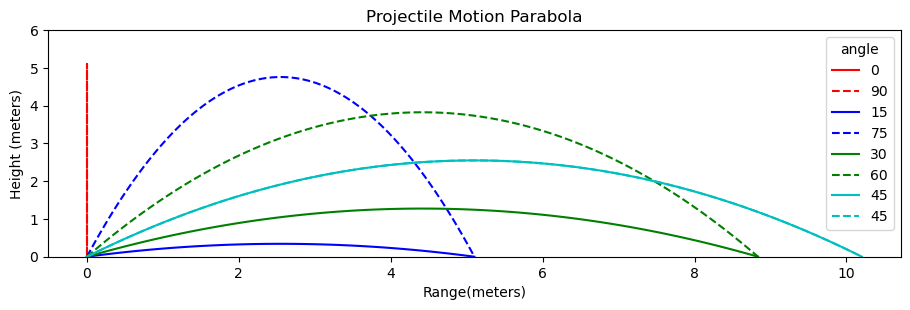

In [8]:
#Plots trajectory for various angles and shows that complementary angle produces same range 
plt.rcParams['figure.figsize'] = [11, 3]
clr = 0
for i in range(0,50,15):
    y_t,x_t = projectile(v=10,ang=i,pts=101)[-2:]
    y1_t,x1_t = projectile(v=10,ang=90-i,pts=101)[-2:]
    plt.plot(x_t,y_t,'-',c=colors_list[clr],label=str(i))
    plt.plot(x1_t,y1_t,'--',c=colors_list[clr],label=str(90-i))
    clr += 1
plt.legend(title='angle')
plt.xlabel('Range(meters)')
plt.ylabel('Height (meters)')
plt.title('Projectile Motion Parabola')
plt.ylim([0,6])

t    1.767s
R    8.837m
hmax    3.827m



Text(0.5, 0, 'Range (m)')

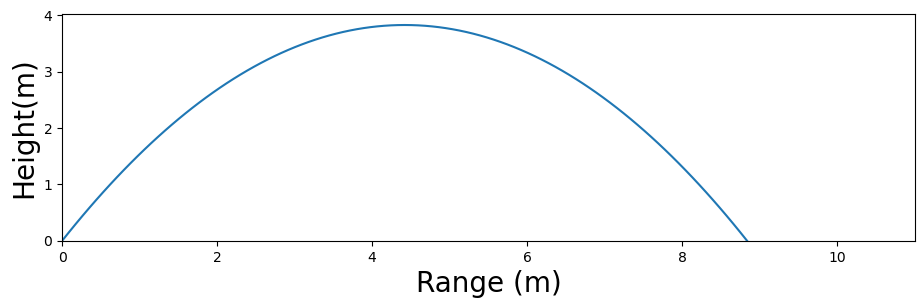

In [5]:
#plots single trajectory showing
plt.rcParams['figure.figsize'] = [11, 3]
t, R, hmax, y_t,x_t = projectile(v=10,ang=60,pts=101)
print("t {0:8.3f}s\nR {1:8.3f}m\nhmax {2:8.3f}m\n".format(t,R,hmax))
plt.plot(x_t,y_t,'-',label=str(i))
plt.ylim([0,plt.ylim()[1]])
plt.xlim([0,11])
plt.ylabel('Height(m)',fontsize=20)
plt.xlabel('Range (m)',fontsize=20)

(0.0, 241.74107142857144)

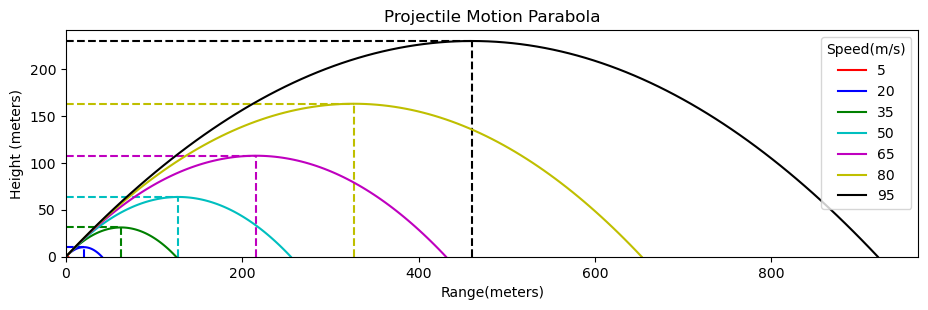

In [7]:
#Trajectory with same launch angle but different launch speeds
clr = 0
for i in range(5,100,15):
    t,R,hmax,y_t,x_t = projectile(v=i,ang=45,pts=101)
    plt.plot(x_t,y_t,'-',c=colors_list[clr%7],label=str(i))
    plt.hlines(hmax,0,R/2,linestyle='dashed',colors=colors_list[clr%7])
    plt.vlines(R/2,0,hmax,linestyle='dashed',colors=colors_list[clr%7])
    clr += 1
plt.legend(title='Speed(m/s)')
plt.xlim([0,plt.xlim()[1]])
plt.xlabel('Range(meters)')
plt.ylabel('Height (meters)')
plt.title('Projectile Motion Parabola')
plt.ylim([0,plt.ylim()[1]])

Text(0, 0.5, 'Distance (m)')

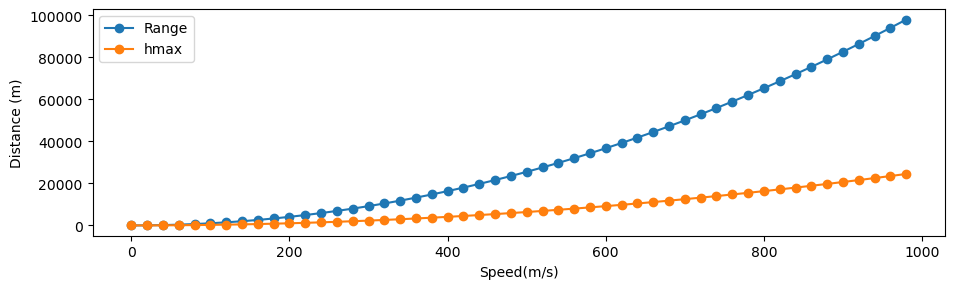

In [9]:
#plotting how range and max height changes with speed. You can vary angles and see how ranges and max height depends on angles
all_hmax,all_R = [],[]
for i in range(0,1000,20):
    t,R,hmax,y_t,x_t = projectile(v=i,ang=45,pts=11)
    all_hmax.append(hmax)
    all_R.append(R)
plt.plot(range(0,1000,20),all_R,'-o',label='Range')
plt.plot(range(0,1000,20),all_hmax,'-o',label='hmax')
plt.legend()
plt.xlabel('Speed(m/s)')
plt.ylabel('Distance (m)')

In [11]:
#This is for calculating range as a function of angles when an object is launched from a height h. (asymmetric projectile case)
def get_distribution(h,v,angles):
    vx0s = v * np.cos(np.radians(angles))
    vy0s = v * np.sin(np.radians(angles))
    #Taking only positive root
    t = (vy0s + np.sqrt(vy0s**2 + 4 * 4.9 * h))/(2*4.9)
    x = vx0s * t
    return x,t,vx0s,vy0s

In [13]:
angles = np.linspace(0,90,91)
x,t,_,_ = get_distribution(1,20,angles)

(5.059058440830239e-15, 45.982156320908594)

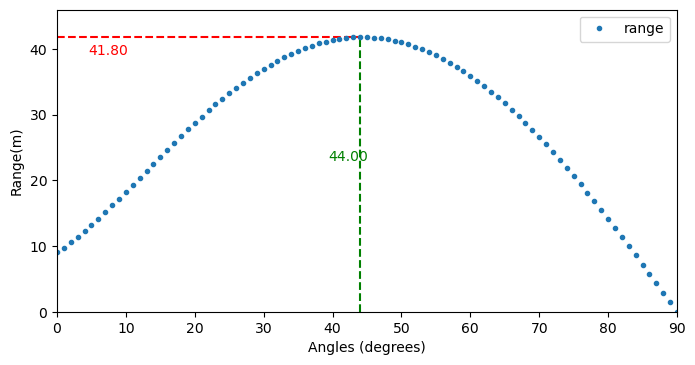

In [15]:
#plotting Range as as function of angles
plt.rcParams['figure.figsize'] = [8, 4]
plt.plot(angles,x,'.',label='range')
plt.xlim([angles[0],angles[-1]])
plt.ylim([np.min(x),np.max(x)+(np.max(x)-np.min(x))*0.1])
plt.hlines(np.max(x),plt.xlim()[0],angles[np.argmax(x)],linestyle='dashed',color='r')
plt.text(plt.xlim()[0]+0.1*(plt.xlim()[1]-plt.xlim()[0])/2,plt.ylim()[0]+1.7*(plt.ylim()[1]-plt.ylim()[0])/2,str("%5.2f"%np.max(x)),color='r')
plt.vlines(angles[np.argmax(x)],plt.ylim()[0],np.max(x),linestyle='dashed',color='g')
plt.text(angles[np.argmax(x)]-0.2*(plt.ylim()[1]-plt.xlim()[0])/2,plt.ylim()[0]+(plt.ylim()[1]-plt.ylim()[0])/2,str("%5.2f"%angles[np.argmax(x)]),color='g')
plt.xlabel('Angles (degrees)')
plt.ylabel('Range(m)')
plt.legend()
plt.xlim([max(0,plt.xlim()[0]),plt.xlim()[1]])
plt.ylim([max(0,plt.ylim()[0]),plt.ylim()[1]])